In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib_venn import venn3, venn3_circles
%matplotlib notebook

In [2]:
fn_analysis= '/mnt/imls-bod/Xiao-Kang/EGF transfection/plots/flags_nbin10_2.5perc_bpr2_median_25_0.1cuo_v2/bindat'
out_fn = '/mnt/imls-bod/Xiao-Kang/EGF transfection/benchmark'

In [3]:
bindat =pd.read_pickle(fn_analysis)

In [10]:
do_save = False

#bindat = bindat.set_index(['perturbation', 'row_col', 'readout', 'origin', 'target'])
#bindat.set_index([(,append=True)

old_idx = list(bindat.index.names)
cols = ['perturbation', 'row_col', 'readout', 'origin', 'target']
bindat = bindat.set_index([(c, 'index') for c in cols], append=True)

bindat.index.names = old_idx+cols

is_flag = heatmat.index.get_level_values('readout') == 'FLAG'
heatmat.loc[is_flag, 'FLAG'] = heatmat.loc[fil, 'GFP']
heatmat.loc[is_flag == False, 'GFP'] = heatmat.loc[fil == False, 'FLAG']

In [4]:
heatmat = bindat[('stats', 'mean_var_ratio')].unstack('target')
# drop flag and GFP, as they are allway the non used readout
heatmat = heatmat.drop(['FLAG', 'GFP'], axis=1)
heatmat = heatmat.dropna(axis=1)
heatmat=heatmat.reset_index(['experiment', 'row_col', 'readout', 'origin'], drop=True)
heatmat = heatmat.applymap( lambda x: max([x,0]))

In [5]:
heatmat = heatmat

<IPython.core.display.Javascript object>


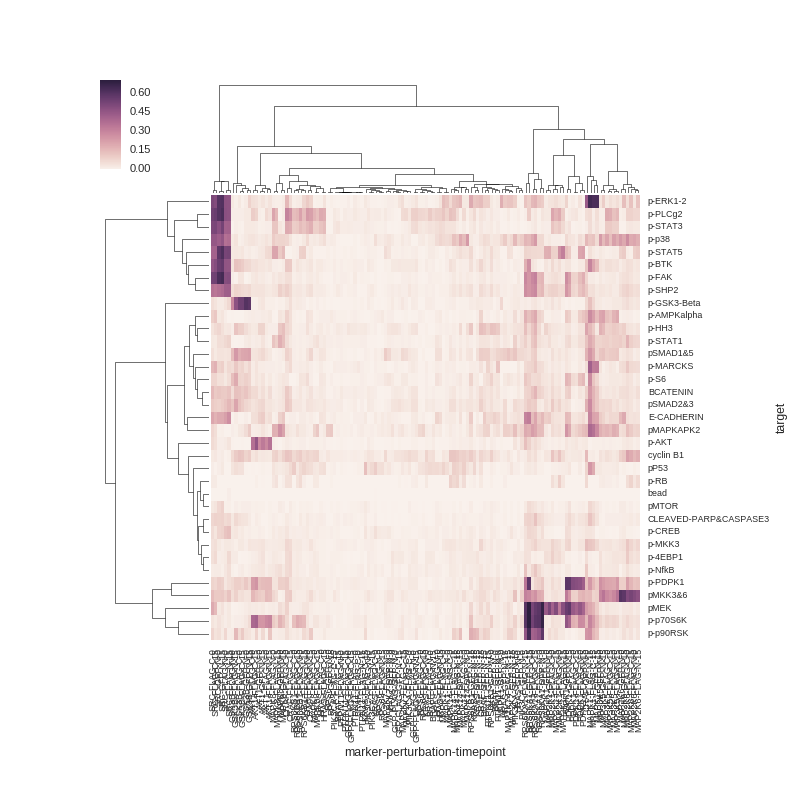

In [6]:


lsize=8

cg = sns.clustermap(heatmat.T, method='ward')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
#cg.ax_heatmap.tick_params(axis='x', which='major', pad=0)
cg.fig.subplots_adjust(bottom=0.2)
cg.fig.subplots_adjust(right=0.8)
cg.ax_heatmap.xaxis.set_tick_params(labelsize=lsize)
cg.ax_heatmap.yaxis.set_tick_params(labelsize=lsize)

/home/vitoz/.virtualenvs/python2_env/lib/python2.7/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


<IPython.core.display.Javascript object>


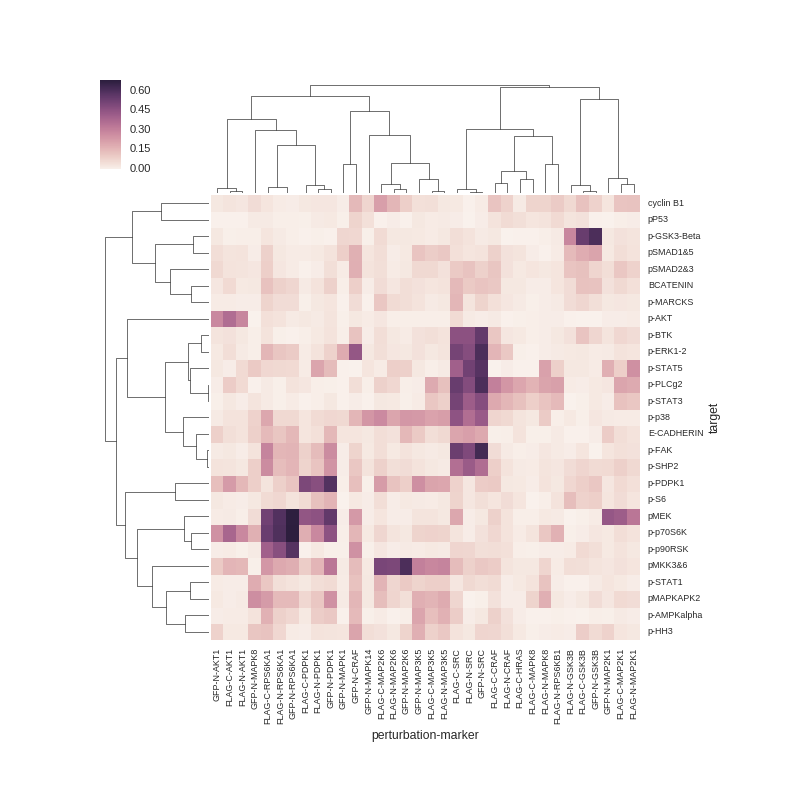

In [7]:
fil = heatmat.max(axis=1) >0.15
fil_mark = heatmat.max(axis=0) >0.15
lsize=8

cg = sns.clustermap(heatmat.loc[fil,fil_mark].swaplevel(2,0).xs(0, level='timepoint').T, method='complete', metric='correlation')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
#cg.ax_heatmap.tick_params(axis='x', which='major', pad=0)
cg.fig.subplots_adjust(bottom=0.2)
cg.fig.subplots_adjust(right=0.8)
cg.ax_heatmap.xaxis.set_tick_params(labelsize=lsize)
cg.ax_heatmap.yaxis.set_tick_params(labelsize=lsize)

In [8]:
fil = heatmat.max(axis=1) >0.11
fil_mark = heatmat.max(axis=0) >0.11
lsize=8

theatmap = heatmat.loc[:, fil_mark].swaplevel(2,0)
theatmap= theatmap.sort_index(level='timepoint').sort_index(level='marker')

def get_colors(values, colormap='pastel'):
    values = pd.Categorical(values)
    colmap = sns.color_palette(colormap, n_colors=len(values.categories))
    col = [colmap[i] for i in values.codes]
    return col

is_any = theatmap.max(axis=1) >0.11
row_cols =[get_colors(vals, cols) for vals, cols in zip([theatmap.index.get_level_values('marker'),
                                                     theatmap.index.get_level_values('timepoint'),
                                                     theatmap.index.get_level_values('perturbation'),
                                                     is_any],
                                                                                         ["Set2","Paired",'dark',"RdBu"])]

<IPython.core.display.Javascript object>


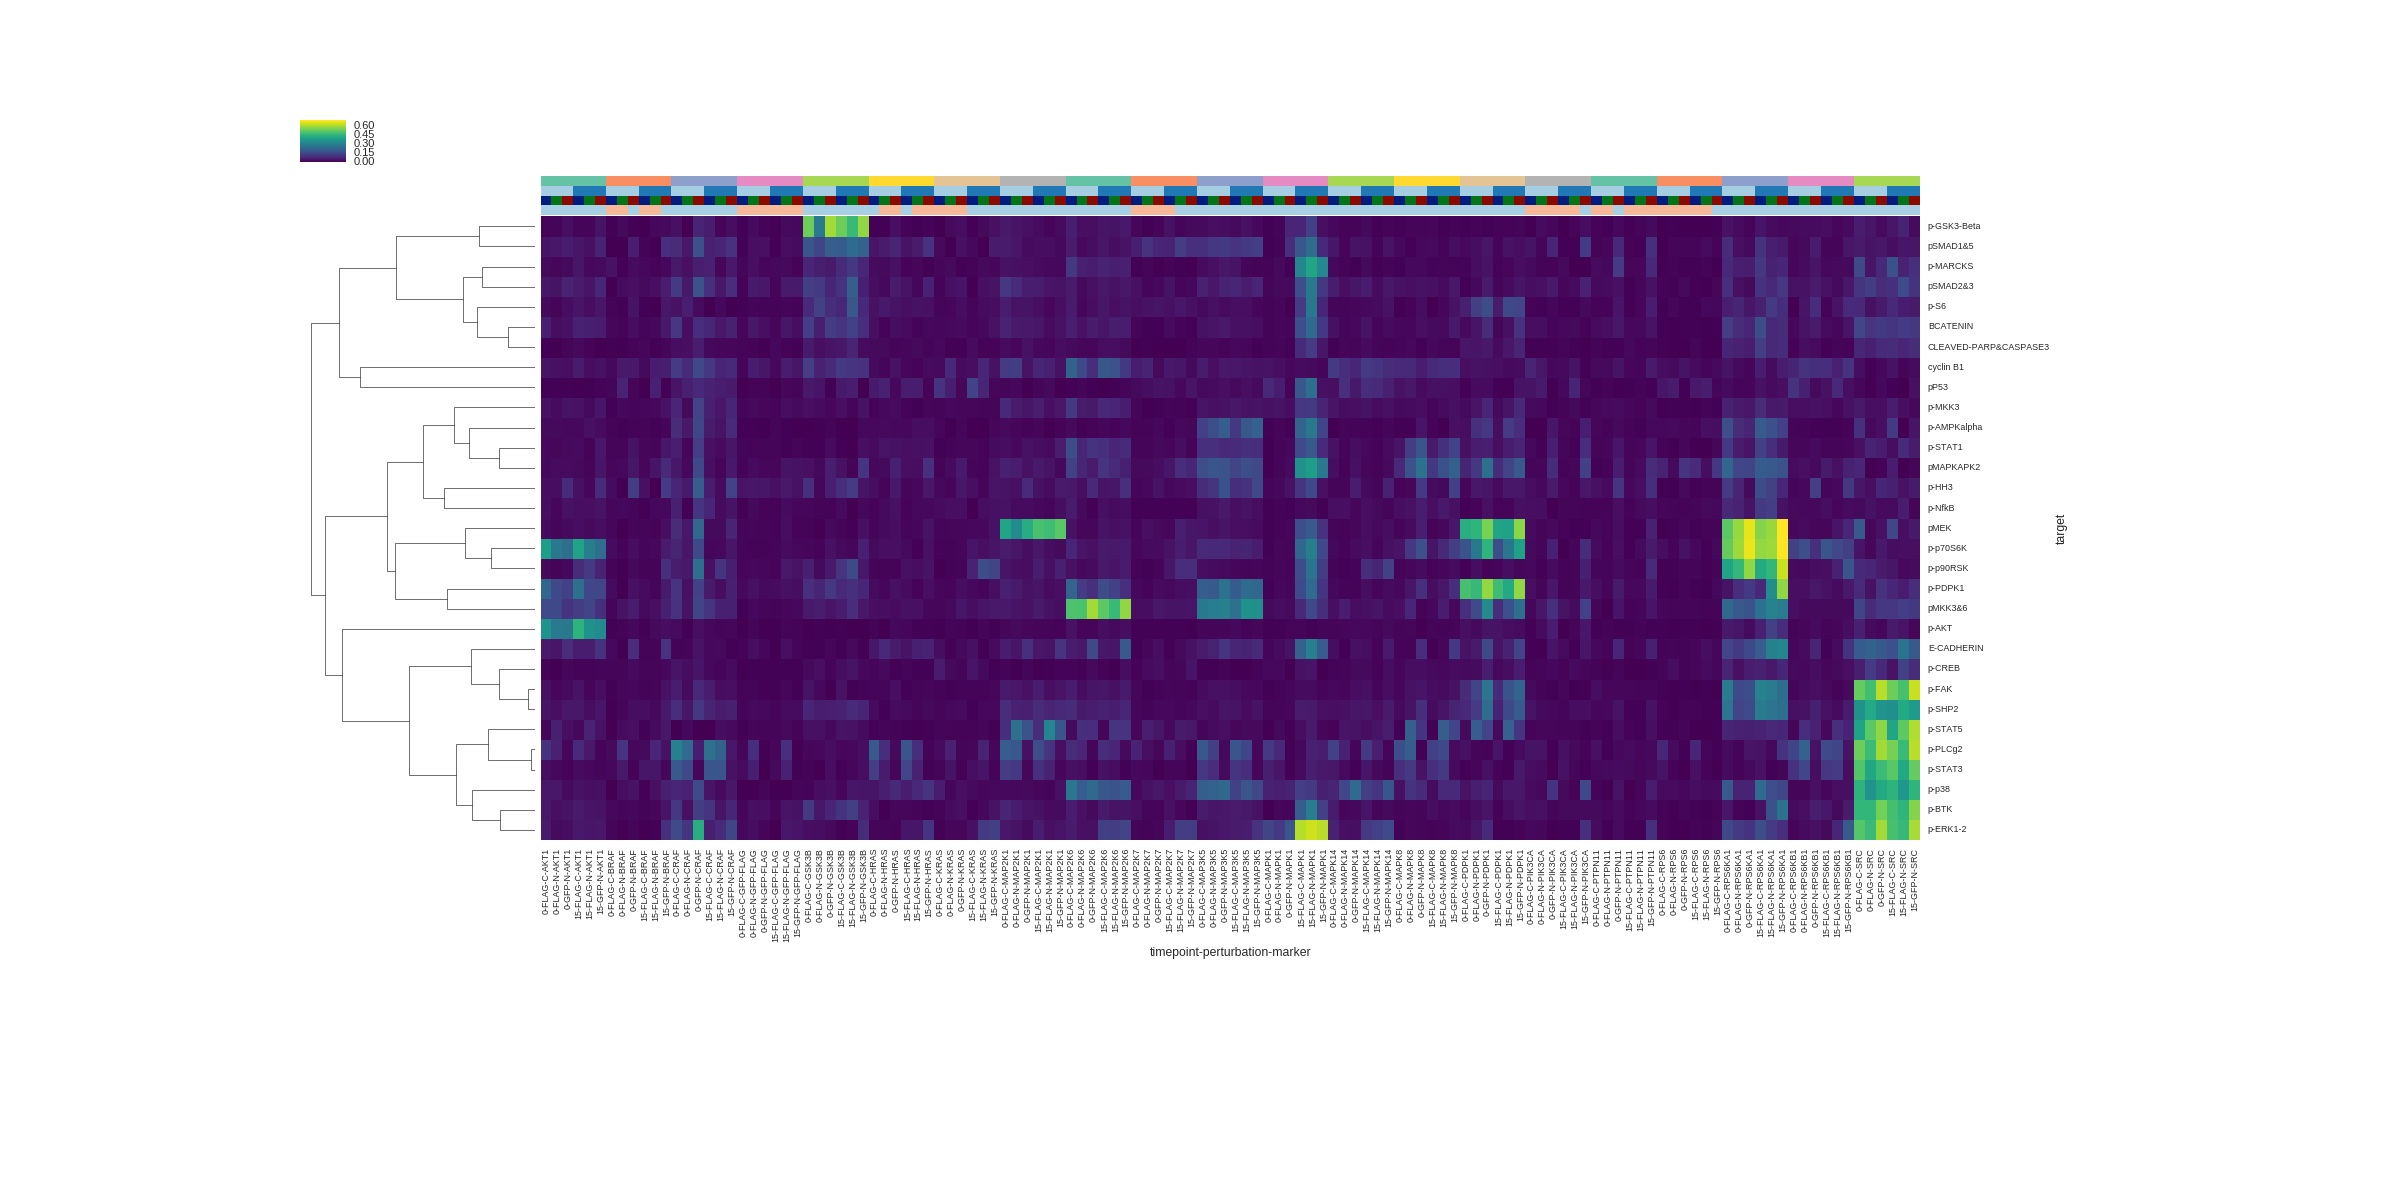

In [9]:


cg = sns.clustermap(theatmap.T, method='complete', metric='correlation',col_cluster=False,
                    cmap='viridis', figsize=(30,15),col_colors=row_cols)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
#cg.ax_heatmap.tick_params(axis='x', which='major', pad=0)
cg.fig.subplots_adjust(bottom=0.3)
cg.fig.subplots_adjust(right=0.8)
cg.fig.subplots_adjust(top=0.9)
cg.ax_heatmap.xaxis.set_tick_params(labelsize=lsize)
cg.ax_heatmap.yaxis.set_tick_params(labelsize=lsize)


# add row

In [151]:
if do_save:
    cg.savefig(os.path.join(out_fn,'tag_comparison.pdf'))

In [52]:
def getsigs(x):
    fil =x['bin_dat_sigfil'] == True
    #fil = x[('stats', 'median_mean_var_ratio')] > 0.14
    return set('_'.join(ot) for ot in zip(x.loc[fil].index.get_level_values('marker'), x.loc[fil].index.get_level_values('target')))


In [53]:
sigs = bindat.xs(0, level='timepoint').groupby(level='perturbation').apply(getsigs)

In [54]:
bindat.columns

MultiIndex(levels=[[u'counts', u'fit_var', u'median', u'overall_var', u'var_ratio', u'stats', u'bin_dat_sigfil', u'bin_dat_sigfil_any', u'bin_dat_sigfil_any_rep'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, u'mean_var_ratio', u'mean_mean_var_ratio', u'median_mean_var_ratio', u'nr_rep', u'corr_pearson_bin', u'corr_spearman_bin', u'corr_pearson_overall', u'corr_spearman_overall', u'median_corr_pearson_overall', u'median_corr_spearman_overall', u'median_abs_corr_pearson_overall', u'median_abs_corr_spearman_overall', u'', u'is_median_varratio']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 8, 5], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 22, 22, 23]],
           names=[None, u'b

<IPython.core.display.Javascript object>


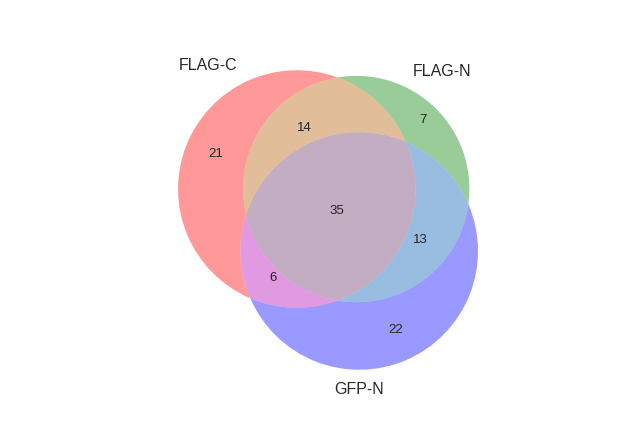

<matplotlib_venn._common.VennDiagram instance at 0x7f06d81a62d8>

In [55]:

venn3(sigs.values,set_labels=sigs.index)

Do the same analysis for the GFP triplicates.